In [2]:
# Week 1 Tasks

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Dataset Exploration
wine_dataset = load_wine()
X = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
y = pd.DataFrame(wine_dataset.target, columns=['target'])

# 3. Data Preprocessing
# Check for missing values
print(X.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [3]:
# Split the dataset into features (X) and target labels (y)
# No missing values, so no handling required
# Perform scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Model 1: Logistic Regression
# Instantiate a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training set
logistic_model.fit(X_train, y_train.values.ravel())

# Evaluate on the testing set
y_predict = logistic_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [4]:
# Week 2 Tasks

# 6. Model 2: Decision Trees
# Instantiate a decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree_model.fit(X_train, y_train.values.ravel())

# Evaluate on the testing set
y_predict_dt = decision_tree_model.predict(X_test)

# Evaluation Metrics for Decision Trees
accuracy_dt = accuracy_score(y_test, y_predict_dt)
precision_dt = precision_score(y_test, y_predict_dt, average='weighted')
recall_dt = recall_score(y_test, y_predict_dt, average='weighted')
f1_dt = f1_score(y_test, y_predict_dt, average='weighted')

# Confusion Matrix for Decision Trees
conf_matrix_dt = confusion_matrix(y_test, y_predict_dt)

# Print results for Decision Trees
print("\nResults for Decision Trees:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")
print("Confusion Matrix:")
print(conf_matrix_dt)



Results for Decision Trees:
Accuracy: 0.9444444444444444
Precision: 0.9462962962962962
Recall: 0.9444444444444444
F1 Score: 0.9439974457215836
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


In [5]:
# 7. Model 3: Support Vector Machines (SVM)
# Instantiate an SVM model
svm_model = SVC(random_state=42)

# Train the model on the training set
svm_model.fit(X_train, y_train.values.ravel())

# Evaluate on the testing set
y_predict_svm = svm_model.predict(X_test)

# Evaluation Metrics for SVM
accuracy_svm = accuracy_score(y_test, y_predict_svm)
precision_svm = precision_score(y_test, y_predict_svm, average='weighted')
recall_svm = recall_score(y_test, y_predict_svm, average='weighted')
f1_svm = f1_score(y_test, y_predict_svm, average='weighted')

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_predict_svm)

# Print results for SVM
print("\nResults for SVM:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")
print("Confusion Matrix:")
print(conf_matrix_svm)



Results for SVM:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [6]:
# 8. Model Evaluation (combined results)
print("\nCombined Results:")
models = ['Logistic Regression', 'Decision Trees', 'SVM']
accuracies = [accuracy, accuracy_dt, accuracy_svm]
precisions = [precision, precision_dt, precision_svm]
recalls = [recall, recall_dt, recall_svm]
f1_scores = [f1, f1_dt, f1_svm]

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})
print(results_df)


Combined Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  1.000000   1.000000  1.000000  1.000000
1       Decision Trees  0.944444   0.946296  0.944444  0.943997
2                  SVM  1.000000   1.000000  1.000000  1.000000


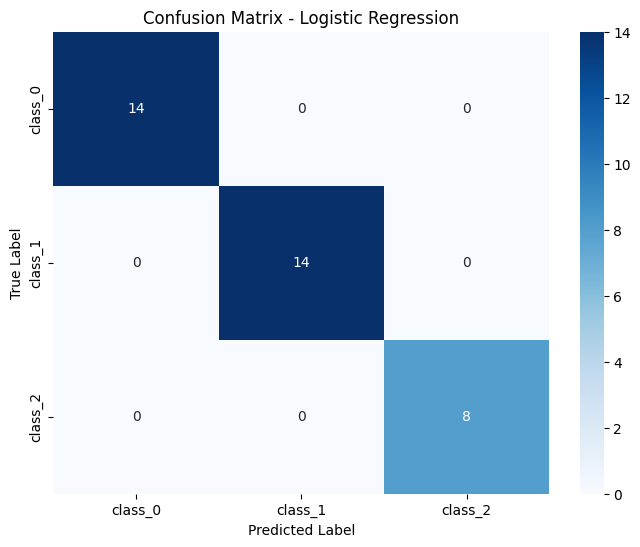

In [7]:
# Week 2 Tasks (Continued)

# 9. Hyperparameter Tuning (Optional)
# Example hyperparameter tuning for SVM
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=3)
svm_grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters
best_svm_params = svm_grid_search.best_params_

# 11. Visualization (Optional)
# Example: Confusion Matrix Heatmap for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=wine_dataset.target_names,
            yticklabels=wine_dataset.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

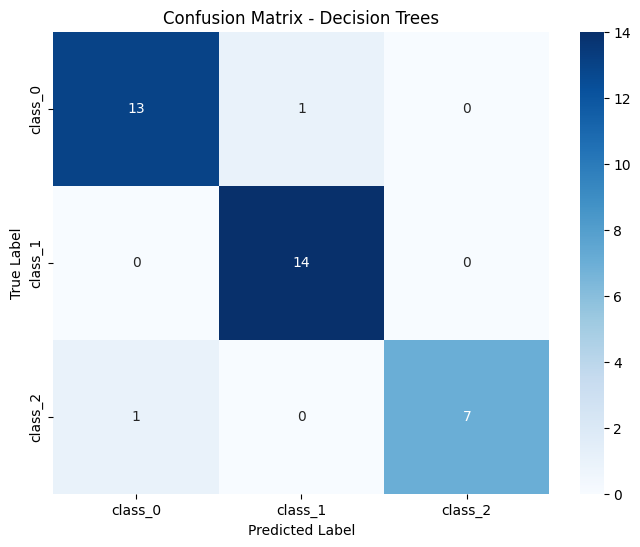

In [8]:
# Example: confusion matrix heat map for Decision Tree
# Convert the confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix_dt, index=wine_dataset.target_names, columns=wine_dataset.target_names)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix - Decision Trees")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

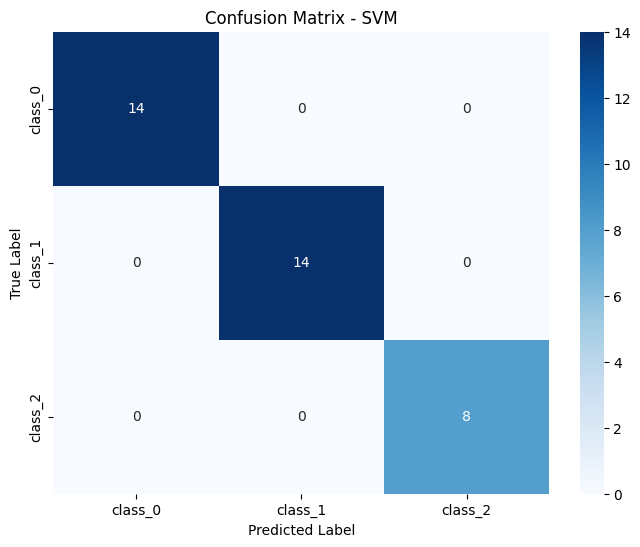

In [9]:
# Example: confusion matrix heat map for svm
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=wine_dataset.target_names,
            yticklabels=wine_dataset.target_names)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


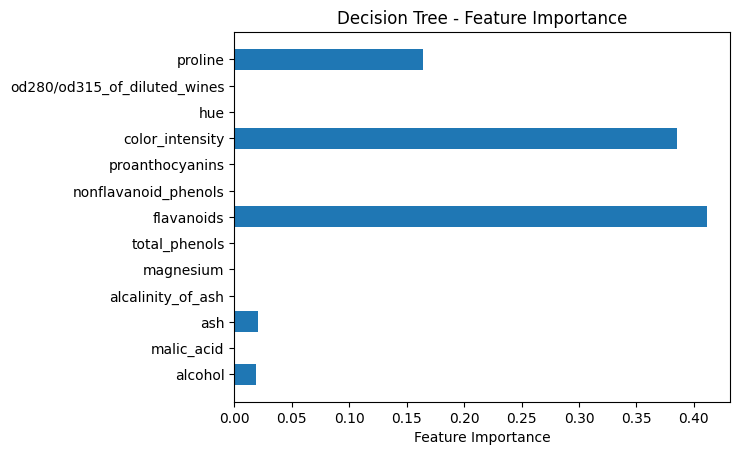

In [10]:
# Example: Feature Importance for Decision Trees
feature_importance = decision_tree_model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Decision Tree - Feature Importance')
plt.show()

In [11]:
# Hyperparameter Tuning for SVM (Continued from Week 2)
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=3)
svm_grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters
best_Svm_params = svm_grid_search.best_params_
print("Best SVM Parameters:", best_svm_params)


Best SVM Parameters: {'C': 10, 'kernel': 'rbf'}


In [13]:
# Results Analysis (Continued from Week 2)
# Comparative Analysis
models = ['Logistic Regression', 'Decision Trees', 'SVM']
accuracies = [accuracy, accuracy_dt, accuracy_svm]
precisions = [precision, precision_dt, precision_svm]
recalls = [recall, recall_dt, recall_svm]
f1_scores = [f1, f1_dt, f1_svm]

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})
print("results:", results_df)


results:                  Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  1.000000   1.000000  1.000000  1.000000
1       Decision Trees  0.944444   0.946296  0.944444  0.943997
2                  SVM  1.000000   1.000000  1.000000  1.000000


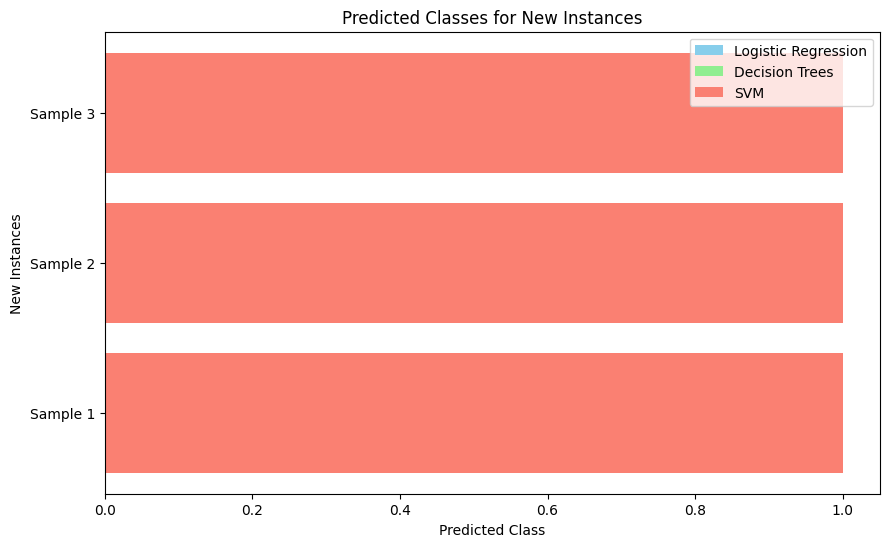

In [14]:
# Step 1: Generate new instances
new_instances = [
    [13.5, 2.5, 2.6, 20.0, 120, 2.6, 2.9, 0.3, 1.2, 3.5, 1.1, 2.7, 1000],  # Sample 1
    [12.0, 1.5, 2.1, 18.0, 88, 2.4, 2.3, 0.2, 0.8, 2.0, 0.8, 3.0, 520],     # Sample 2
    [14.0, 3.0, 2.8, 26.0, 100, 3.2, 3.4, 0.3, 1.8, 5.3, 1.2, 2.8, 900]      # Sample 3
]

# Step 2: Use trained models to predict classes
logistic_regression_predictions = logistic_model.predict(new_instances)
decision_tree_predictions = decision_tree_model.predict(new_instances)
svm_predictions = svm_model.predict(new_instances)

# Step 3: Visualization methods
# For example, you can create a bar chart to visualize the predictions
plt.figure(figsize=(10, 6))
plt.barh(['Sample 1', 'Sample 2', 'Sample 3'], logistic_regression_predictions,
         color='Skyblue', label='Logistic Regression')
plt.barh(['Sample 1', 'Sample 2', 'Sample 3'], decision_tree_predictions, color='lightgreen', label='Decision Trees')
plt.barh(['Sample 1', 'Sample 2', 'Sample 3'], svm_predictions, color='salmon', label='SVM')

plt.xlabel('Predicted Class')
plt.ylabel('New Instances')
plt.title('Predicted Classes for New Instances')
plt.legend()
plt.show()


In [15]:
# New instances
new_instances = [
    [13.5, 2.5, 2.6, 20.0, 120, 2.6, 2.9, 0.3, 1.2, 3.5, 1.1, 2.7, 1000],  # Sample 1
    [12.0, 1.5, 2.1, 18.0, 88, 2.4, 2.3, 0.2, 0.8, 2.0, 0.8, 3.0, 520],     # Sample 2
    [14.0, 3.0, 2.8, 26.0, 100, 3.2, 3.4, 0.3, 1.8, 5.3, 1.2, 2.8, 900]      # Sample 3
]

# Logistic Regression
logistic_regression_predictions_new = logistic_model.predict(new_instances)

# Decision Trees
decision_tree_predictions_new = decision_tree_model.predict(new_instances)

# SVM
svm_predictions_new = svm_model.predict(new_instances)

# Output predictions
print("Logistic Regression Predictions for New Instances:", logistic_regression_predictions_new)
print("Decision Trees Predictions for New Instances:", decision_tree_predictions_new)
print("SVM Predictions for New Instances:", svm_predictions_new)

Logistic Regression Predictions for New Instances: [0 0 0]
Decision Trees Predictions for New Instances: [0 0 0]
SVM Predictions for New Instances: [1 1 1]


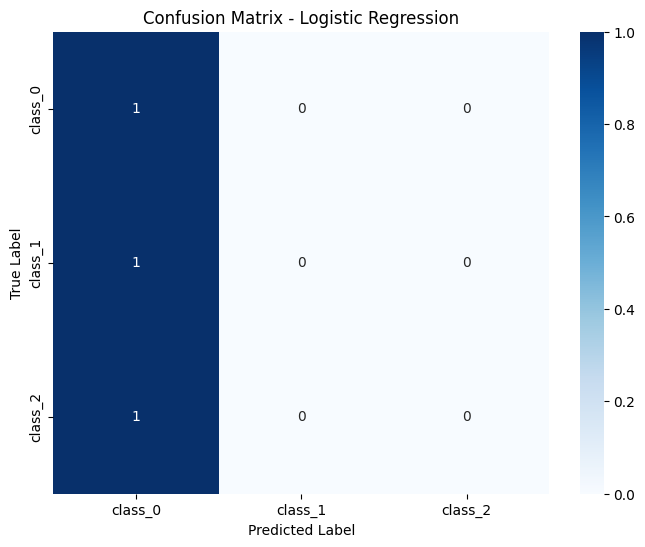

In [16]:
# True labels for the new instances (assuming known true labels)
true_labels = [0, 1, 2]  # Assuming the true labels for the new instances

# Confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(true_labels, logistic_regression_predictions_new)

# Confusion matrix for Decision Trees
conf_matrix_dt = confusion_matrix(true_labels, decision_tree_predictions_new)

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(true_labels, svm_predictions_new)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=wine_dataset.target_names,
            yticklabels=wine_dataset.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

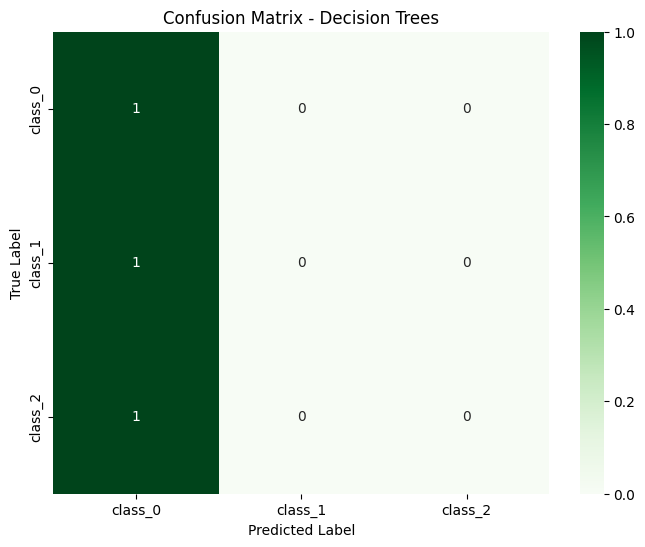

In [17]:
# Plot confusion matrix for Decision Trees
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", xticklabels=wine_dataset.target_names,
            yticklabels=wine_dataset.target_names)
plt.title("Confusion Matrix - Decision Trees")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

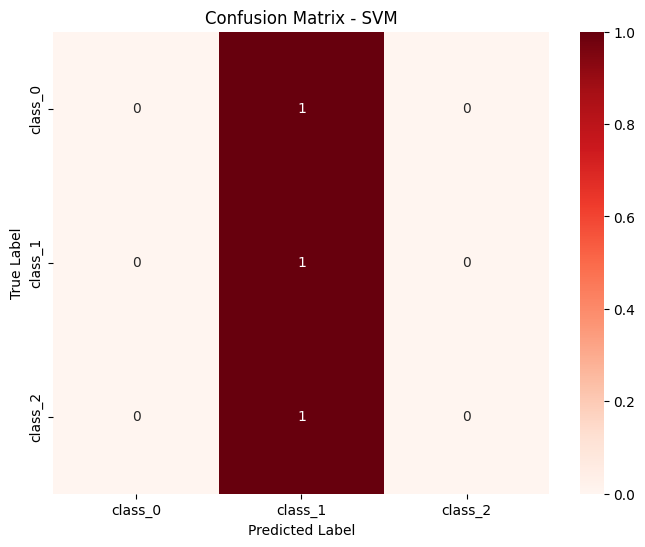

In [18]:
# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Reds", xticklabels=wine_dataset.target_names,
            yticklabels=wine_dataset.target_names)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
